In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as df
from MSM_util import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import sys, scipy, numpy

# print(scipy.__version__, numpy.__version__, sys.version_info)

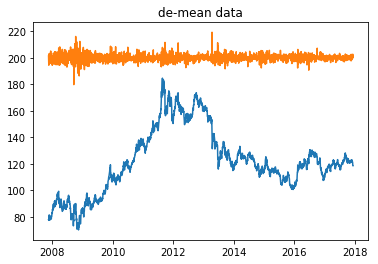

In [15]:
# Hyper parameters

# How much period taken into calculation and prediction
m = 20
# number of days prediction
RV = 22
# kbar
kbar = 4

xls_data = pd.read_excel('data_GVZ_GLD.xlsx')
date_GLD = xls_data.iloc[:,3]
GLD = xls_data.loc[:,'GLD']

GLD2 = GLD.shift(1)
GLD2[0] = GLD[0]
GLD_r = GLD/GLD2

GLD_d = GLD_r - np.mean(GLD_r)
plt.plot(date_GLD,GLD)
plt.title('de-mean data')
plt.plot(date_GLD,200*GLD_r)

data = GLD_d[::-1]


startingvals = []#[1.2, 1.2, 0.5 , 1.2 ]
LB = [1, 1, 0.001, 0.0001]
UB = [1.99, 50, 0.99999, 5]
op_methods = 'slsqp'



plt.show()

# Fit data

In [16]:
output =msm_fitseries(data, kbar, LB, UB, op_methods, startingvals, m, RV)

No starting values entered: Using grid-search
LL = -7823.6257
==========init params=========
m0 =   1.3831
b =   1.5000
gamma_k =   0.1000
sigma =   0.1934


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4705
b =  27.1079
gamma_k =   0.9220
sigma =   0.2676
LLs = -7852.8359
AIC =  25.9373
BIC =  17.9373
No starting values entered: Using grid-search
LL = -7824.5649
==========init params=========
m0 =   1.3836
b =   1.5000
gamma_k =   0.1000
sigma =   0.1934


 ==========fitted results==========
optimization method = slsqp
m0 =   1.4708
b =  27.2075
gamma_k =   0.9213
sigma =   0.2676
LLs = -7853.7790
AIC =  25.9375
BIC =  17.9375
No starting values entered: Using grid-search
LL = -7827.4457
==========init params=========
m0 =   1.3838
b =   1.5000
gamma_k =   0.1000
sigma =   0.1932


 ==========fitted results==========
optimization method = slsqp
m0 =   1.5237
b =  50.0000
gamma_k =   0.9523
sigma =   0.3342
LLs = -7854.4556
AIC =  25.9377
BIC =  17.9377
No s

In [17]:
a = output
a["GVZ"] = xls_data["GVZ"]
a

,RV,m0,b,gamma_k,sigma,GVZ
0,13.752135,1.470464,27.107902,0.922001,0.267586,11.70
1,13.753032,1.470847,27.207474,0.921260,0.267594,12.99
2,21.457099,1.523742,49.999983,0.952330,0.334244,11.67
3,13.754450,1.471757,27.084811,0.920946,0.267608,12.28
4,13.779103,1.472643,26.931715,0.921747,0.267848,11.38
5,13.776703,1.471661,27.049873,0.921196,0.267824,11.39
6,13.800970,1.471411,26.768781,0.920632,0.268060,11.79
7,13.800670,1.471645,26.995204,0.920377,0.268057,11.02
8,13.815724,1.471522,26.946431,0.920957,0.268203,10.64
9,13.830924,1.471917,27.090265,0.920989,0.268351,10.72


## plot

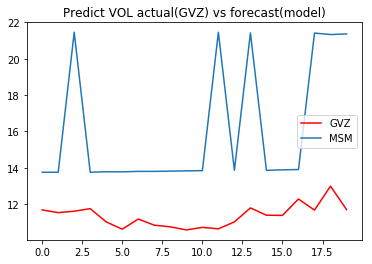

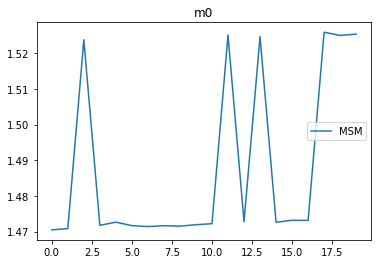

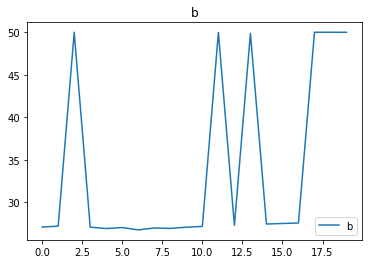

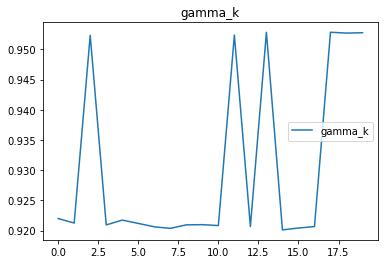

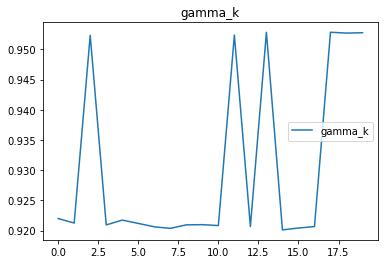

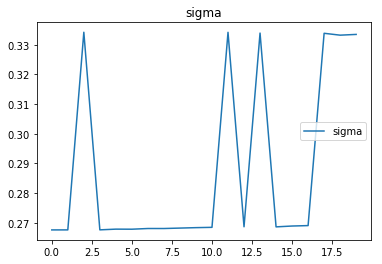

In [18]:
datainreg = xls_data["GVZ"][::-1]
data_lastm = datainreg
data_lastm = data_lastm.iloc[-m:]
msm_plot(xls_data["GVZ"], output, m)

## Regression

In [19]:
datainreg = xls_data["GVZ"][::-1]
data_lastm = datainreg
data_lastm = data_lastm.iloc[-m:]

linreg(df(output['RV']), df(data_lastm))

Slope :  0.0703259124038
Intercept :  10.2252715972


(0.070325912403752106, 10.225271597225175)

## XLSX

In [20]:
from datetime import date
text = 'MSM_fitparam'
namew=text + "_kbar" + str(kbar)+ "_RV" + str(22) +'_m' +str(m)+".xlsx"
writer = pd.ExcelWriter("".join((date.today().strftime('%y%m%d'),namew)))
print(writer.path)
output.to_excel(writer, 'Sheet2')
writer.save()

180210MSM_fitparam_kbar4_RV22_m20.xlsx


### load

In [21]:
xls_file = pd.ExcelFile('180209RV22m10.xlsx')
output = xls_file.parse('Sheet2')

# Average params

In [22]:
output2 = msm_averageparams(output, kbar, m, data, RV, LB , UB)

In [28]:
output2

,RV,m0,b,gamma_k,sigma
0,10.691455,1.502392,39.116365,0.930174,0.235937
1,10.691455,1.502392,39.116365,0.930174,0.235937
2,10.691455,1.502392,39.116365,0.930174,0.235937
3,10.691455,1.502392,39.116365,0.930174,0.235937
4,10.691455,1.502392,39.116365,0.930174,0.235937
5,10.691455,1.502392,39.116365,0.930174,0.235937
6,10.691455,1.502392,39.116365,0.930174,0.235937
7,10.691455,1.502392,39.116365,0.930174,0.235937
8,10.691455,1.502392,39.116365,0.930174,0.235937
9,10.691455,1.502392,39.116365,0.930174,0.235937


## plot

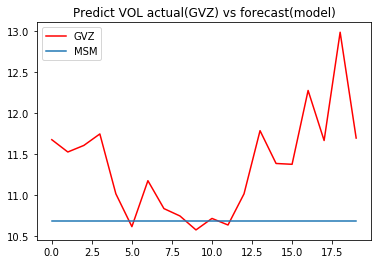

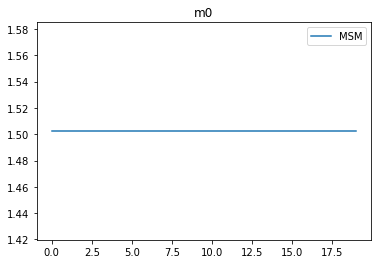

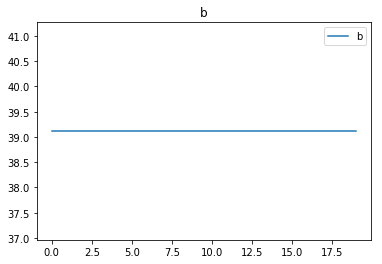

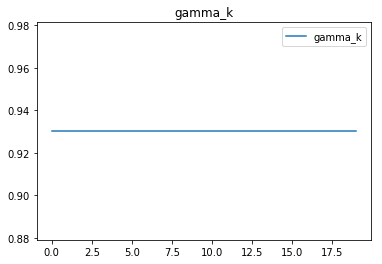

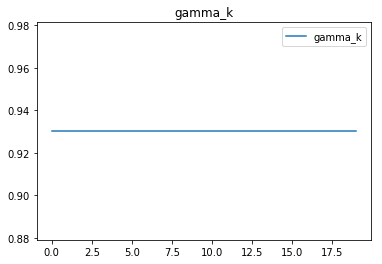

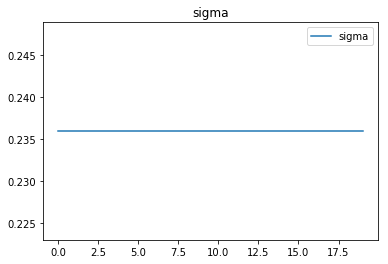

In [24]:
datainreg = xls_data["GVZ"][::-1]
data_lastm = datainreg
data_lastm = data_lastm.iloc[-m:]
msm_plot(xls_data["GVZ"], output2, m)

## Regression

In [25]:
datainreg = xls_data["GVZ"][::-1]
data_lastm = datainreg
data_lastm = data_lastm.iloc[-m:]

linreg(df(output2['RV']), df(data_lastm))

Slope :  -8.61313428735e+13
Intercept :  9.2086939308e+14


(-86131342873460.703, 920869393080458.0)

In [26]:
data_lastm

19    11.68
18    11.53
17    11.61
16    11.75
15    11.02
14    10.62
13    11.18
12    10.84
11    10.75
10    10.58
9     10.72
8     10.64
7     11.02
6     11.79
5     11.39
4     11.38
3     12.28
2     11.67
1     12.99
0     11.70
Name: GVZ, dtype: float64